<a href="https://colab.research.google.com/github/Avibabar45/ANN-Project/blob/main/Churn_Modelling_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
## import some basice library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent feature
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
## Feature Engineering
geography = pd.get_dummies(X["Geography"],drop_first = True)
gender = pd.get_dummies(X["Gender"],drop_first = True)

In [ ]:
## concatenate these variables with dataframe
X=X.drop(["Geography","Gender"],axis = 1)

In [ ]:
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X =pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
## Spliting the dataset into traning set and test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state = 0)

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape


(8000, 11)

In [ ]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### lets initialize the ANN
classifier = Sequential()

In [ ]:
## Add input layers
classifier.add(Dense(units=11,activation="relu"))

In [ ]:
### first hiddent layers
classifier.add(Dense(units=7,activation="relu"),Dropout(0.3))

In [ ]:
### adding the second hidden layer
classifier.add(Dense(units=6,activation="relu"),Dropout(0.3))

In [ ]:
## adding the output layers
classifier.add(Dense(1,activation="sigmoid"),Dropout(0.3))

In [ ]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early stoping
import tensorflow as tf
Early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=Early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7950 - loss: 0.5676 - val_accuracy: 0.7955 - val_loss: 0.5023
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8011 - loss: 0.4834 - val_accuracy: 0.7955 - val_loss: 0.4603
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7873 - loss: 0.4674 - val_accuracy: 0.7955 - val_loss: 0.4459
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8146 - loss: 0.4500 - val_accuracy: 0.8243 - val_loss: 0.4352
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8384 - loss: 0.4194 - val_accuracy: 0.8258 - val_loss: 0.4323
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8421 - loss: 0.4108 - val_accuracy: 0.8311 - val_loss: 0.4291
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8473 - loss: 0.4056 - val_accuracy: 0.8323 - val_loss: 0.4274
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8324 - loss: 0.4145 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

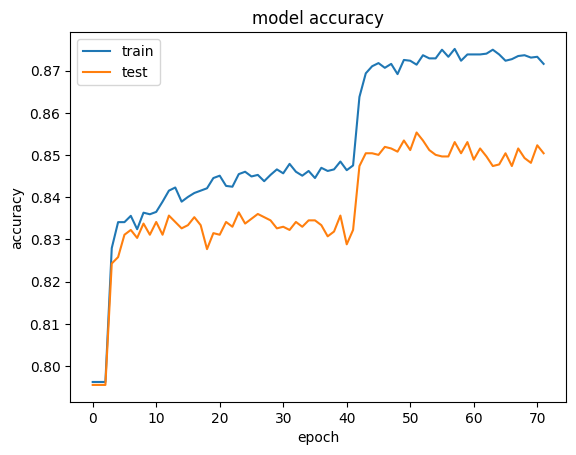

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test',],loc='upper left')
plt.show()

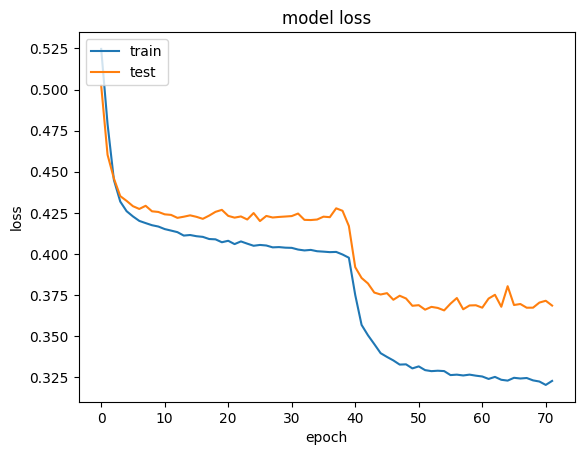

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test',],loc='upper left')
plt.show()

In [ ]:
## part 3 - making the predictions and evaluating the model
# predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
## make the confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1519,   76],
       [ 212,  193]])

In [ ]:
## xcalculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.856

In [ ]:
## get the weights
classifier.get_weights()

[array([[ 4.58229244e-01,  2.36084685e-03, -1.70340940e-01,
         -1.38943702e-01, -4.23096389e-01,  7.67921954e-02,
          1.41071096e-01, -1.22760653e-01, -4.52902377e-01,
         -3.48199040e-01,  2.98202746e-02],
        [ 9.58802104e-02, -8.34215283e-01, -5.92881560e-01,
         -2.49424383e-01,  3.73488903e-01, -9.09086287e-01,
          8.16257834e-01, -8.96587491e-01, -7.32029736e-01,
         -5.36901653e-01, -7.80394256e-01],
        [-1.53693274e-01,  4.43646833e-02,  6.40527189e-01,
         -7.00080320e-02,  4.49183881e-01, -6.74823001e-02,
          5.44958282e-03, -5.24644069e-02, -1.14974581e-01,
         -7.40425363e-02,  1.70585811e-01],
        [ 8.37068558e-02, -2.24093944e-01,  3.16868633e-01,
         -5.78225493e-01,  1.15872592e-01, -3.35207507e-02,
         -4.29219782e-01, -1.66877046e-01, -6.16090298e-01,
          2.47805342e-01, -5.94839394e-01],
        [-3.65768880e-01,  1.62007678e+00,  5.62467158e-01,
         -4.48350698e-01, -2.92670608e-01, -